In [1]:
import os
import re
import datetime 

import pandas as pd
import numpy as np

from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib import ticker

%matplotlib inline

data_dir = '/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/notebooks/datasets/new_dataset/'
grid_search_dir = '/Users/boyuliu/Dropbox (MIT)/Boyu-Joann/Intermediate output/outputs/grid_search/'

wv_data_file = data_dir + 'regression_data_wv_cases1_causal_ma_detrend_20210301.csv'
residual_data = grid_search_dir + 'residual_over_time_02192021.csv'
df = pd.read_csv(wv_data_file)
print(df.shape)
df.head()

(6554, 60)


,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,demand_shock_plus_8,demand_shock_minus_1,demand_shock_minus_2,demand_shock_minus_3,demand_shock_minus_4,demand_shock_minus_5,demand_shock_minus_6,demand_shock_minus_7,demand_shock_minus_8,yr_wk_float
0,Ang Thong,2018-02,0.0,0.0,0.0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,NaN,NaN,0.000000,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,2018.02
1,Ang Thong,2018-03,0.0,0.0,0.0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,NaN,0.000000,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,2018.03
2,Ang Thong,2018-04,0.0,0.0,0.0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,NaN,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,2018.04
3,Ang Thong,2018-05,10.0,0.0,0.0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,NaN,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,-0.368763,2018.05
4,Ang Thong,2018-06,0.0,0.0,0.0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,NaN,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,-0.368763,0.000000,2018.06


In [2]:
print(df.province.nunique())
df.province.unique()

58


array(['Ang Thong', 'Bangkok', 'Buri Ram', 'Chachoengsao', 'Chainat',
       'Chaiyaphum', 'Chanthaburi', 'Chiang Mai', 'Chiang Rai',
       'Chonburi', 'Chumphon', 'Kalasin', 'Kamphaeng Phet',
       'Kanchanaburi', 'Khon Kaen', 'Krabi', 'Lampang', 'Lamphun',
       'Lopburi', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Ratchasima',
       'Nakhon Sawan', 'Nakhon Si Thammarat', 'Narathiwat', 'Nong Khai',
       'Nonthaburi', 'Pathum Thani', 'Phang Nga', 'Phetchabun',
       'Phetchaburi', 'Phitsanulok', 'Phra Nakhon Si Ayutthaya', 'Phrae',
       'Phuket', 'Prachin Buri', 'Prachuap Khiri Khan', 'Ranong',
       'Ratchaburi', 'Rayong', 'Sa Kaeo', 'Sakon Nakhon', 'Samut Prakan',
       'Samut Sakhon', 'Samut Songkhram', 'Saraburi', 'Satun', 'Si Saket',
       'Sing Buri', 'Songkhla', 'Sukhothai', 'Suphanburi', 'Surat Thani',
       'Tak', 'Trang', 'Trat', 'Udon Thani', 'Uthai Thani'], dtype=object)

In [3]:
df.year_week.min(), df.year_week.max()

('2018-02', '2020-09')

In [4]:
def week_num_to_date(w):
    # return date of the first day of week
    return dt.strptime(w + '-1', "%Y-%W-%w").date().isoformat()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


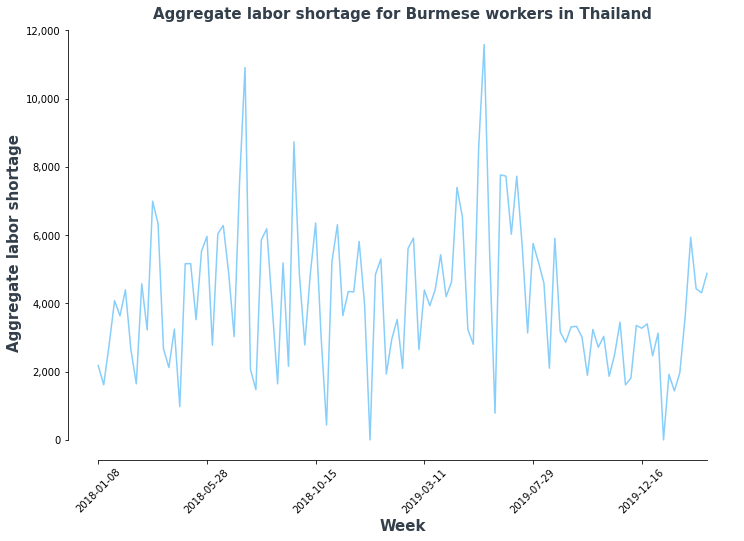

In [6]:
weekly_ts = df.groupby('year_week').sum()['total_demand'].values
num_weeks = df.year_week.nunique()
xtick_locs = range(0, num_weeks, 20)
weeks = sorted(df.year_week.unique().tolist())
weeks_label = [week_num_to_date(weeks[i]) for i in xtick_locs]

fig, ax = plt.subplots(1,1, figsize = (12, 8))
plt.plot(weekly_ts, color='lightskyblue')
plt.xticks(ticks=xtick_locs, labels=weeks_label, rotation='45')
plt.xlabel('Week', fontsize=15, fontweight='black', color = '#333F4B')
plt.title('Aggregate labor shortage for Burmese workers in Thailand', 
          fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Aggregate labor shortage', fontsize=15, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)


ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig('../../../plots/paper/aggregate_demand_ts.jpg')
plt.show()

In [7]:
# need to remove these weeks from analysis data
[weeks[i] for i in range(num_weeks) if weekly_ts[i]==0]

['2018-52', '2020-01']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


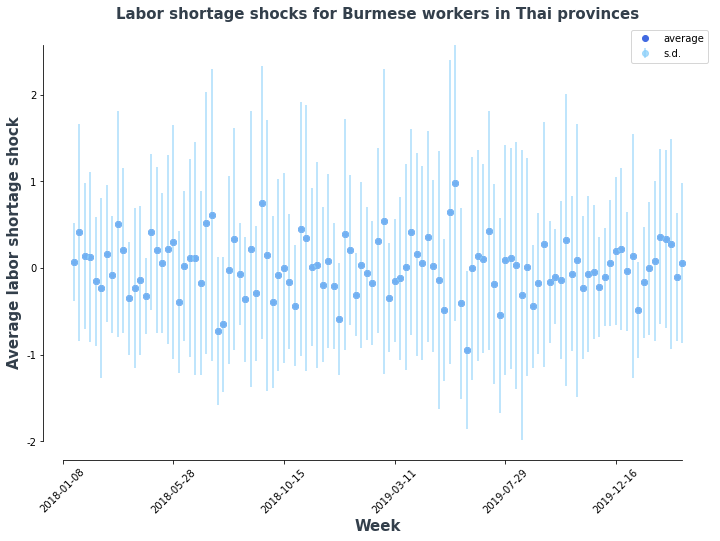

In [8]:
weekly_shock_ts = df.groupby('year_week').mean()['demand_shock'].values
std_demand_shock = df.groupby('year_week').std()['demand_shock'].values
num_weeks = df.year_week.nunique()
xtick_locs = range(0, num_weeks, 20)
weeks = sorted(df.year_week.unique().tolist())
weeks_label = [week_num_to_date(weeks[i]) for i in xtick_locs]

fig, ax = plt.subplots(1,1, figsize = (12, 8))
plt.plot(weekly_shock_ts, 'o', color='royalblue', label='average')
plt.errorbar(range(0, num_weeks), weekly_shock_ts, yerr=std_demand_shock, fmt='o', alpha=0.7, 
             color='lightskyblue', label='s.d.')

plt.xticks(ticks=xtick_locs, labels=weeks_label, rotation='45')
plt.xlabel('Week', fontsize=15, fontweight='black', color = '#333F4B')
plt.title('Labor shortage shocks for Burmese workers in Thai provinces', 
          fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Average labor shortage shock', fontsize=15, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)


ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend()

plt.savefig('../../../plots/paper/demand_shocks_ts.jpg')
plt.show()

In [10]:
#### OLD data including 2017
# data_dir = '/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/notebooks/datasets/new_dataset/'
# raw_demand_3yrs = pd.read_csv(data_dir + 'raw_demand_3yrs.csv')
# weekly_ts = raw_demand_3yrs.groupby('year_week').sum()['total'].values
# num_weeks = raw_demand_3yrs.year_week.nunique()
# xtick_locs = range(0, num_weeks, 20)
# weeks = sorted(raw_demand_3yrs.year_week.unique().tolist())
# weeks_label = [week_num_to_date(weeks[i]) for i in xtick_locs]

# fig, ax = plt.subplots(1,1, figsize = (12, 8))
# plt.plot(weekly_ts, color='lightskyblue')
# plt.xticks(ticks=xtick_locs, labels=weeks_label, rotation='45')
# plt.xlabel('Week', fontsize=15, fontweight='black', color = '#333F4B')
# plt.title('Aggregate excess demand for Burmese workers in Thailand', 
#           fontsize=15, fontweight='black', color = '#333F4B')
# plt.ylabel('Aggregate excess demand', fontsize=15, fontweight='black', color = '#333F4B')

# ax.spines['top'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.spines['left'].set_smart_bounds(True)
# ax.spines['bottom'].set_smart_bounds(True)


# ax.get_yaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plt.savefig('../../../plots/paper/aggregate_demand_ts.jpg')
# plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


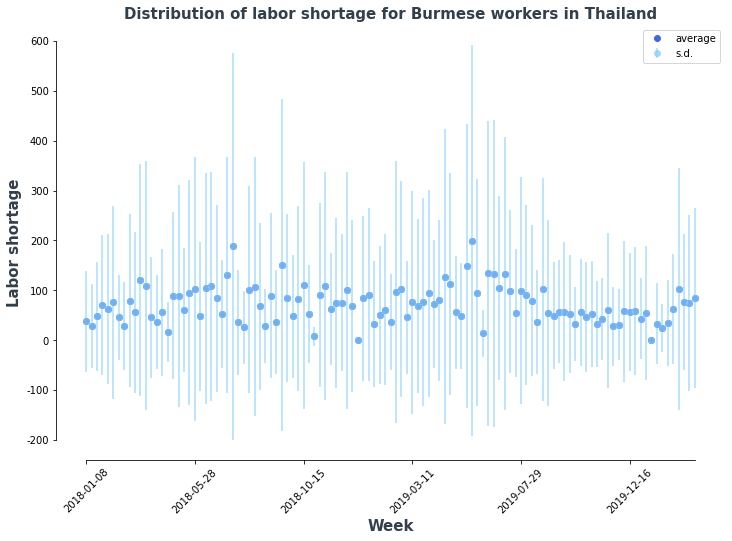

In [9]:
plotdata = df

weekly_ts = plotdata.groupby('year_week').mean()['total_demand'].values
std_demand = plotdata.groupby('year_week').std()['total_demand'].values
num_weeks = plotdata.year_week.nunique()
xtick_locs = range(0, num_weeks, 20)
weeks = sorted(plotdata.year_week.unique().tolist())
weeks_label = [week_num_to_date(weeks[i]) for i in xtick_locs]

fig, ax = plt.subplots(1,1, figsize = (12, 8))

plt.plot(range(0, num_weeks), weekly_ts, 'o', color='royalblue', label='average')
plt.errorbar(range(0, num_weeks), weekly_ts, yerr=std_demand, fmt='o', alpha=0.7, 
             color='lightskyblue', label='s.d.')

plt.xticks(ticks=xtick_locs, labels=weeks_label, rotation='45')
plt.xlabel('Week', fontsize=15, fontweight='black', color = '#333F4B')
plt.title('Distribution of labor shortage for Burmese workers in Thailand', 
          fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Labor shortage', fontsize=15, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.legend()
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig('../../../plots/paper/demand_mean_and_std.jpg')
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


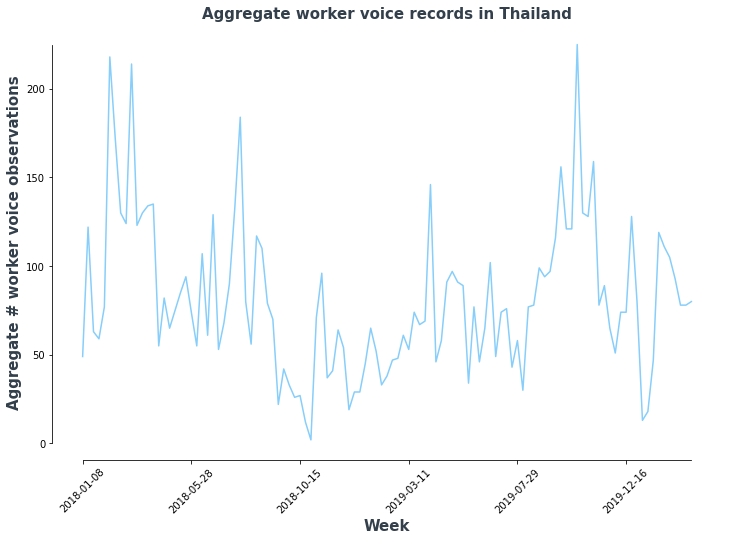

In [39]:
num_weeks = df.year_week.nunique()
xtick_locs = range(0, num_weeks, 20)
weeks = sorted(df.year_week.unique().tolist())
weeks_label = [week_num_to_date(weeks[i]) for i in xtick_locs]

fig, ax = plt.subplots(1,1, figsize = (12, 8))
plt.plot(df.groupby('year_week').sum()['wv_count'].values, color='lightskyblue')

plt.xticks(ticks=xtick_locs, labels=weeks_label, rotation='45')

plt.xlabel('Week', fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Aggregate # worker voice observations', fontsize=15, fontweight='black', color = '#333F4B')
plt.title('Aggregate worker voice records in Thailand', fontsize=15, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.savefig('../../../plots/paper/wv_count_ts.jpg')
plt.show()

In [15]:
df['wv_count'].sum()/num_weeks

81.91818181818182

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


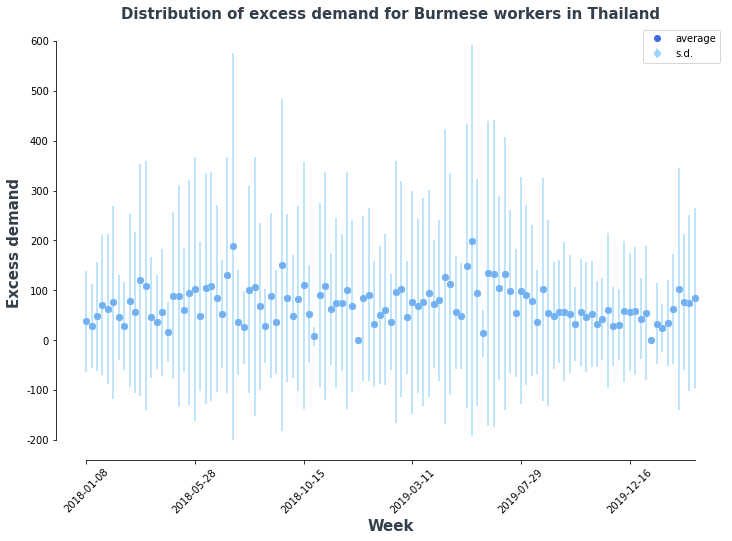

In [17]:
weekly_ts = df.groupby('year_week').mean()['total_demand'].values
std_demand = df.groupby('year_week').std()['total_demand'].values

xtick_locs = range(0, num_weeks, 20)
weeks = sorted(df.year_week.unique().tolist())
weeks_label = [week_num_to_date(weeks[i]) for i in xtick_locs]

fig, ax = plt.subplots(1,1, figsize = (12, 8))

plt.plot(range(0, num_weeks), weekly_ts, 'o', color='royalblue', label='average')
plt.errorbar(range(0, num_weeks), weekly_ts, yerr=std_demand, fmt='o', alpha=0.7, 
             color='lightskyblue', label='s.d.')

plt.xticks(ticks=xtick_locs, labels=weeks_label, rotation='45')
plt.xlabel('Week', fontsize=15, fontweight='black', color = '#333F4B')
plt.title('Distribution of excess demand for Burmese workers in Thailand', 
          fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Excess demand', fontsize=15, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.legend()
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plt.savefig('../../../plots/paper/demand_mean_and_std.jpg')
plt.show()

In [42]:
df.head()

,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,demand_shock_minus_1,demand_shock_minus_2,demand_shock_minus_3,demand_shock_minus_4,demand_shock_minus_5,demand_shock_minus_6,demand_shock_minus_7,demand_shock_minus_8,yr_wk_float,abuse
0,Ang Thong,2018-02,0.0,0.0,0.0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,NaN,0.000000,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,2018.02,0.0
1,Ang Thong,2018-03,0.0,0.0,0.0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,0.000000,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,2018.03,0.0
2,Ang Thong,2018-04,0.0,0.0,0.0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,0.983368,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,2018.04,0.0
3,Ang Thong,2018-05,10.0,0.0,0.0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,-0.245842,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,-0.368763,2018.05,0.0
4,Ang Thong,2018-06,0.0,0.0,0.0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,-0.245842,-0.245842,1.229210,-0.368763,-0.368763,-0.368763,-0.368763,0.000000,2018.06,0.0


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


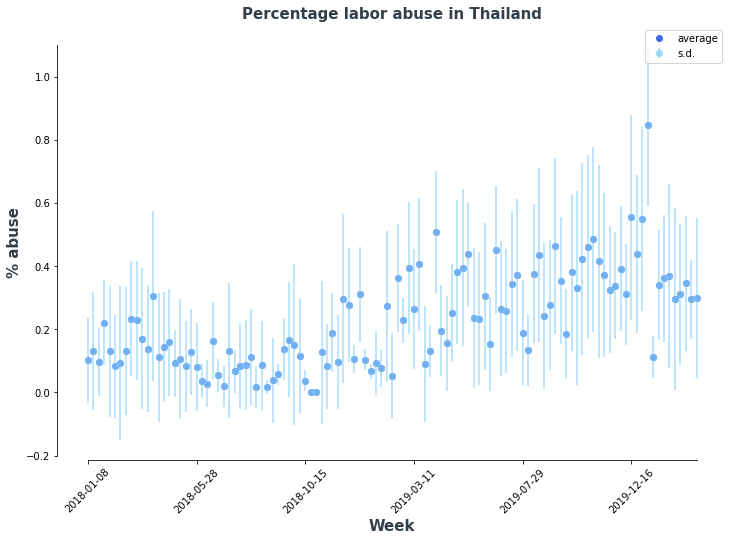

In [41]:
df['abuse'] = df['perc_abuse'] * df['wv_count']
ave_abuse = df.groupby('year_week').sum()['abuse'].values / df.groupby('year_week').sum()['wv_count'].values
std_abuse = df.groupby('year_week').std()['perc_abuse']

weekly_ts = df.groupby('year_week').sum()['total_demand'].values
# xtick_locs = range(0, 141, 20)
weeks = sorted(df.year_week.unique().tolist())
weeks_label = [week_num_to_date(weeks[i]) for i in xtick_locs]


fig, ax = plt.subplots(1,1, figsize = (12, 8))
# plt.plot(range(0, 145), ave_abuse)
plt.plot(range(0, num_weeks), ave_abuse, 'o', color='royalblue', label='average')
plt.errorbar(range(0, num_weeks), ave_abuse, yerr=std_abuse, fmt='o', alpha=0.7, 
             color='lightskyblue', label='s.d.')
plt.xticks(ticks=xtick_locs, labels=weeks_label, rotation='45')
plt.xlabel('Week', fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('% abuse', fontsize=15, fontweight='black', color = '#333F4B')
plt.title('Percentage labor abuse in Thailand', fontsize=15, fontweight='black', color = '#333F4B')
plt.legend()

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.savefig('../../../plots/paper/ave_perc_abuse_ts.jpg')
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


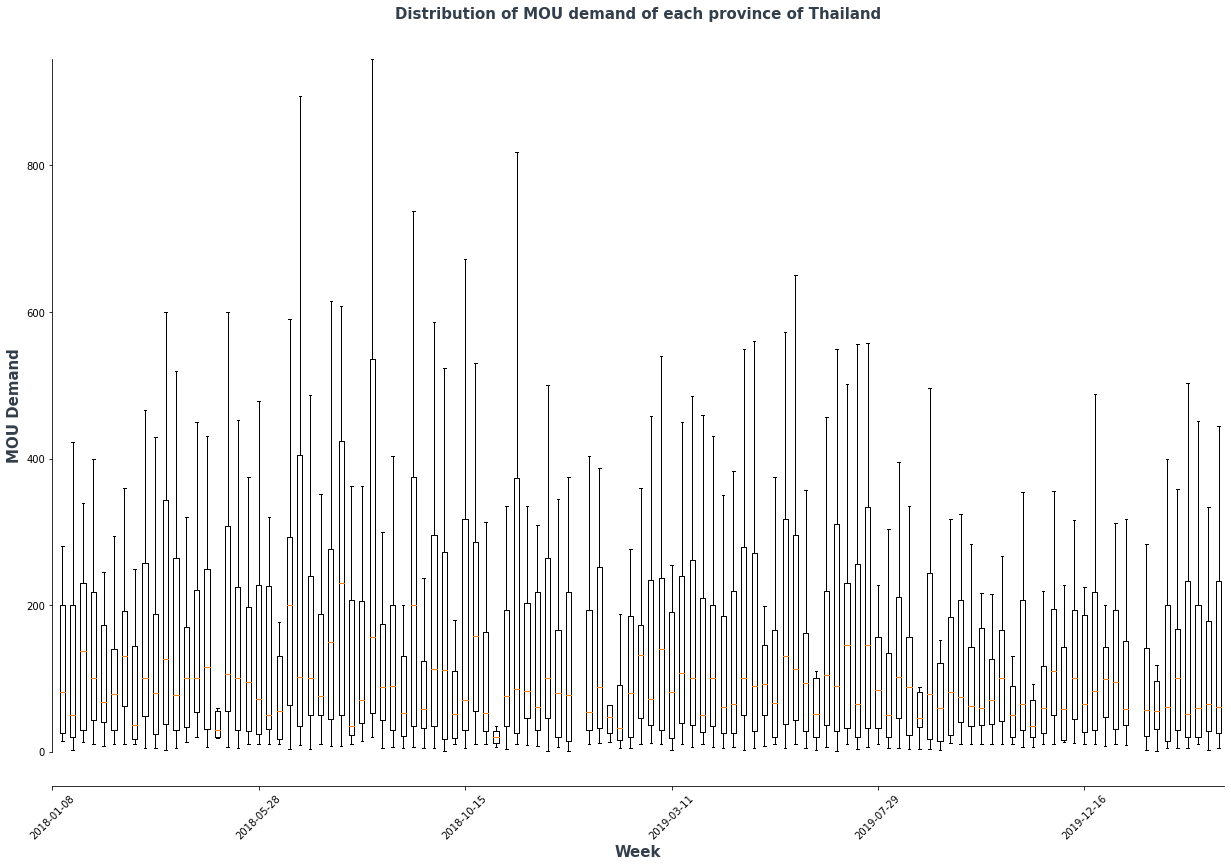

In [20]:
boxplot_data = df.sort_values('year_week')[['year_week','total_demand']]
y_weeks = boxplot_data.year_week.unique()
boxplot_data_l = []
for w in y_weeks:
    boxplot_data_l.append(boxplot_data[(boxplot_data.year_week==w)&(boxplot_data.total_demand>0)].total_demand.values)
fig, ax = plt.subplots(1,1, figsize = (21, 14))
# plt.plot(weekly_ts)
plt.boxplot(boxplot_data_l, showfliers=False)
plt.xticks(ticks=xtick_locs, labels=weeks_label, rotation='45')
plt.xlabel('Week', fontsize=15, fontweight='black', color = '#333F4B')
plt.title('Distribution of MOU demand of each province of Thailand', 
          fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('MOU Demand', fontsize=15, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
# plt.savefig('../../plots/paper/aggregate_demand_boxplot.jpg')
plt.show()    

In [23]:
df.year_week.max(), df.year_week.min()

('2020-09', '2018-02')

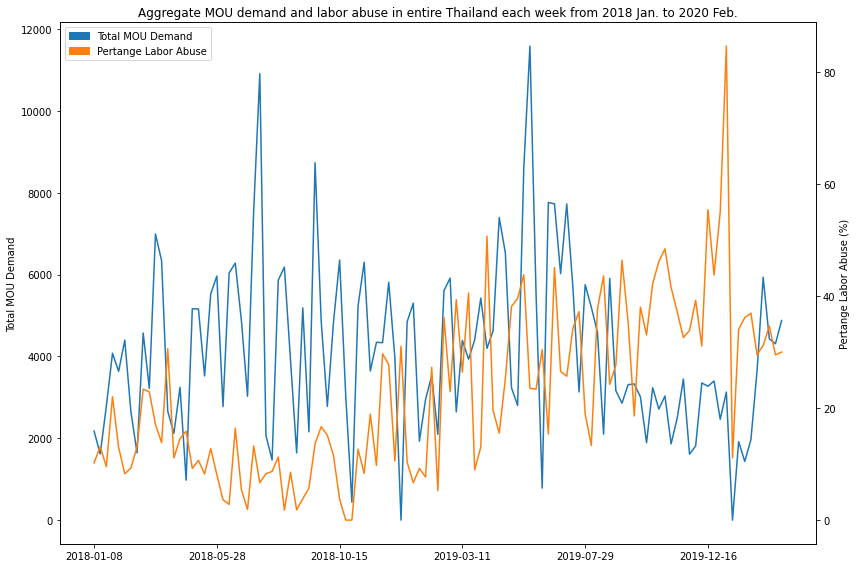

In [43]:
fig, ax1 = plt.subplots(1,1, figsize = (12, 8))
color = 'tab:blue'
weekly_ts = df.groupby('year_week').sum()['total_demand'].values
plt.plot(weekly_ts, color=color)
ax1.set_ylabel('Total MOU Demand')

ax2 = ax1.twinx()
color = 'tab:orange'
plt.plot(ave_abuse*100, color=color)
ax2.set_ylabel('Pertange Labor Abuse (%)')

blue_patch = mpatches.Patch(color='tab:blue', label='Total MOU Demand')
orange_patch = mpatches.Patch(color='tab:orange', label='Pertange Labor Abuse')
# plt.rcParams["legend.fontsize"] = 24
plt.legend(handles=[blue_patch, orange_patch])

plt.xticks(ticks=xtick_locs, labels=weeks_label, rotation='45')
plt.xlabel('Week')
plt.title('Aggregate MOU demand and labor abuse in entire Thailand each week from 2018 Jan. to 2020 Feb.')

fig.tight_layout() 
# plt.savefig('../plots/paper/demand_and_abuse_ts.jpg')
plt.show()

# plot effect dissipation

In [2]:
df = pd.read_csv('/Users/boyuliu/Dropbox (MIT)/Boyu-Joann/Intermediate output/outputs/final_result/for_plot.csv')
df.head()

,lag,beta,std
0,1,0.043058,0.033091
1,2,0.081902,0.041932
2,3,0.087718,0.045259
3,4,0.186753,0.063589


In [30]:
t_val = 1.644854
df['beta'] = 100*df['beta']
df['std'] = 100*df['std']
df['lower_CI'] = df['beta'] - t_val * df['std']
df['upper_CI'] = df['beta'] + t_val * df['std']
df.head()

,lag,beta,std,lower_CI,upper_CI
3,4,18.675286,6.358888,8.215845,29.134728
2,3,8.771828,4.525917,1.327356,16.216301
1,2,8.190165,4.193244,1.292891,15.087440
0,1,4.305762,3.309058,-1.137154,9.748679


In [9]:
df=df.sort_values('lag', ascending=False)
df

,lag,beta,std,lower_CI,upper_CI
3,4,0.186753,0.063589,0.082158,0.291347
2,3,0.087718,0.045259,0.013274,0.162163
1,2,0.081902,0.041932,0.012929,0.150874
0,1,0.043058,0.033091,-0.011372,0.097487


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  


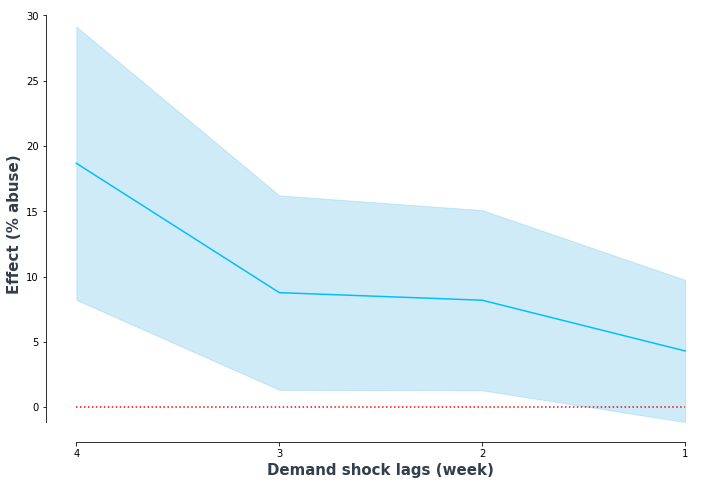

In [32]:
fig, ax = plt.subplots(1,1, figsize = (12, 8))
# g = sns.lineplot(x="lag", y="beta", data=df)
plt.plot(range(1,5), df.beta, c='deepskyblue')
plt.xticks(range(1,5), df.lag.values)
# axis = df.plot(y='beta', kind='line', color='deepskyblue')
# _ = axis.set_xticklabels(df['lag'])
plt.hlines(0, 1, 4, colors='red', linestyles='dotted')
plt.fill_between(range(1,5), df.lower_CI.values, df.upper_CI.values, alpha=0.4, color='skyblue')
plt.xlabel('Demand shock lags (week)', fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Effect (% abuse)', fontsize=15, fontweight='black', color = '#333F4B')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.savefig('../../../plots/paper/effect_dissipation.jpg')
plt.show()